In [181]:
#Import pandas and read csv files containing indices and ROI
import pandas as pd
import gurobipy as gp


df_index = pd.read_csv('index_data.csv')
df_roi = pd.read_csv('ROI_data.csv')
df_roi_mat = pd.read_csv('roi_mat.csv')

df_index.columns[2:]
df_roi_mat.columns[1:]

Index(['Print', 'TV', 'SEO', 'AdWords', 'Facebook', 'LinkedIn', 'Instagram',
       'Snapchat', 'Twitter', 'Email'],
      dtype='object')

In [117]:
# Constraints
# Print + TV <= Facebook + Email

# Facebook, LinkedIn, Instagram, Snapchat, and Twitter >= 2(SEO and AdWords)

# Pi <= 3mil

model = gp.Model()

model_vars = model.addMVar(10)

model.addConstr(model_vars[0]+model_vars[1] <= model_vars[4]+model_vars[9])
model.addConstr(model_vars[4]+model_vars[5]+model_vars[6]+model_vars[7]+model_vars[8] >= 2*( model_vars[2]+model_vars[3]))
model.addConstrs(model_vars[i] <= 3000000 for i in range(10))
model.addConstr(gp.quicksum(model_vars[i] for i in range(10)) <= 10000000 )


model.setObjective(gp.quicksum(df_roi.iloc[0,i+1]*model_vars[i] for i in range(10) ),gp.GRB.MAXIMIZE)


In [118]:
model.Params.OutputFlag = 0 # tell gurobi to shut up!!
model.optimize()

In [119]:
val1 = model.ObjVal
val1


456000.0

In [120]:
df_result = pd.DataFrame()
df_result['Channel'] = df_index.columns[1:]
df_result['Value1'] = model_vars.x

df_result


,Channel,Value1
0,Print,0.0
1,TV,3000000.0
2,SEO,0.0
3,AdWords,1000000.0
4,Facebook,0.0
5,LinkedIn,0.0
6,Instagram,3000000.0
7,Snapchat,0.0
8,Twitter,0.0
9,Email,3000000.0


In [121]:
model = gp.Model()

model_vars = model.addMVar(10)

model.addConstr(model_vars[0]+model_vars[1] <= model_vars[4]+model_vars[9])
model.addConstr(model_vars[4]+model_vars[5]+model_vars[6]+model_vars[7]+model_vars[8] >= 2*( model_vars[2]+model_vars[3]))
model.addConstrs(model_vars[i] <= 3000000 for i in range(10))
model.addConstr(gp.quicksum(model_vars[i] for i in range(10)) <= 10000000 )


model.setObjective(gp.quicksum(df_roi.iloc[1,i+1]*model_vars[i] for i in range(10) ),gp.GRB.MAXIMIZE)

In [122]:
model.Params.OutputFlag = 0 # tell gurobi to shut up!!
model.optimize()
val2 = model.ObjVal


In [123]:
#df_result = pd.DataFrame()
#df_result['Channel'] = df_index.columns[1:]
df_result['Value2'] = model_vars.x

df_result

,Channel,Value1,Value2
0,Print,0.0,3000000.0
1,TV,3000000.0,0.0
2,SEO,0.0,0.0
3,AdWords,1000000.0,1000000.0
4,Facebook,0.0,3000000.0
5,LinkedIn,0.0,3000000.0
6,Instagram,3000000.0,0.0
7,Snapchat,0.0,0.0
8,Twitter,0.0,0.0
9,Email,3000000.0,0.0


In [133]:
#Q5

(gp.quicksum(df_roi.iloc[0,i+1]*df_result.iloc[i,2] for i in range(10))) - val1




<gurobi.LinExpr: -204000.0>

In [135]:
(gp.quicksum(df_roi.iloc[1,i+1]*df_result.iloc[i,1] for i in range(10))) - val2

<gurobi.LinExpr: -192000.0>

In [136]:
model = gp.Model()

model_vars = model.addMVar(10)

model.addConstr(model_vars[0]+model_vars[1] <= model_vars[4]+model_vars[9])
model.addConstr(model_vars[4]+model_vars[5]+model_vars[6]+model_vars[7]+model_vars[8] >= 2*( model_vars[2]+model_vars[3]))
#model.addConstrs(model_vars[i] <= 3000000 for i in range(10))
model.addConstr(gp.quicksum(model_vars[i] for i in range(10)) <= 10000000 )


model.setObjective(gp.quicksum(df_roi.iloc[1,i+1]*model_vars[i] for i in range(10) ),gp.GRB.MAXIMIZE)

In [138]:
model.Params.OutputFlag = 0 # tell gurobi to shut up!!
model.optimize()
model.ObjVal

465000.0

In [140]:
df_result['Value3'] = model_vars.x

df_result

,Channel,Value1,Value2,Value3
0,Print,0.0,3000000.0,5000000.0
1,TV,3000000.0,0.0,0.0
2,SEO,0.0,0.0,0.0
3,AdWords,1000000.0,1000000.0,0.0
4,Facebook,0.0,3000000.0,5000000.0
5,LinkedIn,0.0,3000000.0,0.0
6,Instagram,3000000.0,0.0,0.0
7,Snapchat,0.0,0.0,0.0
8,Twitter,0.0,0.0,0.0
9,Email,3000000.0,0.0,0.0


In [146]:
model = gp.Model()

model_vars = model.addMVar(10)

model.addConstr(model_vars[0]+model_vars[1] <= model_vars[4]+model_vars[9])
model.addConstr(model_vars[4]+model_vars[5]+model_vars[6]+model_vars[7]+model_vars[8] >= 2*( model_vars[2]+model_vars[3]))
model.addConstrs(model_vars[i] <= 3000000 for i in range(10))
model.addConstr(gp.quicksum(model_vars[i] for i in range(10)) <= 10000000 )


model.setObjective(gp.quicksum(df_roi.iloc[0,i+1]*model_vars[i] for i in range(10) ),gp.GRB.MAXIMIZE)
model.Params.OutputFlag = 0 # tell gurobi to shut up!!
model.optimize()

In [147]:
model_vars.SAObjLow

array([ -inf, 0.039,  -inf, 0.033,  -inf,  -inf, 0.039,  -inf,  -inf,
       0.029])

In [148]:
model_vars.SAObjUp

array([0.049, 0.062, 0.039, 0.046, 0.029, 0.039,   inf, 0.039, 0.039,
         inf])

In [208]:
df_alloc = pd.DataFrame()

mkt_ret = 0
for iter in range(12):
    month = df_roi_mat.iloc[iter,0]
    model = gp.Model()

    model_vars = model.addMVar(10)

    model.addConstr(model_vars[0]+model_vars[1] <= model_vars[4]+model_vars[9])
    model.addConstr(model_vars[4]+model_vars[5]+model_vars[6]+model_vars[7]+model_vars[8] >= 2*( model_vars[2]+model_vars[3]))
    model.addConstrs(model_vars[i] <= 3*10**6 for i in range(10))
    model.addConstr(gp.quicksum(model_vars[i] for i in range(10)) <= (10**7)*(1  + mkt_ret) )


    model.setObjective(gp.quicksum(df_roi_mat.iloc[iter,i+1]*model_vars[i] for i in range(10) ),gp.GRB.MAXIMIZE)
    model.Params.OutputFlag = 0 # tell gurobi to shut up!!
    model.optimize()

    mkt_ret = model.objVal/(10**9)/2
    df_alloc[str(month)] = model_vars.x

df_alloc = df_alloc.T


In [209]:
df_alloc.columns = df_roi_mat.columns[1:]
df_alloc = df_alloc.applymap(lambda x: '{:.0f}'.format(x))

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,3000000,0,0,1333333,0,0,2666667,0,0,3000000
February,3000000,0,0,2395500,3000000,0,0,0,1791000,0
March,0,0,0,3000000,0,3000000,1203148,0,3000000,0
April,0,0,0,3000000,0,3000000,3000000,0,1203758,0
May,1200168,0,0,0,0,0,3000000,0,3000000,3000000
June,3000000,0,0,0,0,0,3000000,0,1205503,3000000
July,0,0,0,3000000,1211905,0,3000000,0,3000000,0
August,2714132,0,0,1500000,0,0,0,0,3000000,3000000
September,609498,0,0,3000000,0,3000000,0,0,3000000,609498
October,0,0,0,3000000,0,3000000,3000000,0,0,1201356


In [211]:
df_alloc.pct_change()

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,0.000000,NaN,NaN,0.796625,inf,NaN,-1.000000,NaN,inf,-1.000000
March,-1.000000,NaN,NaN,0.252348,-1.0,inf,inf,NaN,0.675042,NaN
April,NaN,NaN,NaN,0.000000,NaN,0.0,1.493459,NaN,-0.598747,NaN
May,inf,NaN,NaN,-1.000000,NaN,-1.0,0.000000,NaN,1.492195,inf
June,1.499651,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,-0.598166,0.000000
July,-1.000000,NaN,NaN,inf,inf,NaN,0.000000,NaN,1.488588,-1.000000
August,inf,NaN,NaN,-0.500000,-1.0,NaN,-1.000000,NaN,0.000000,inf
September,-0.775435,NaN,NaN,1.000000,NaN,inf,NaN,NaN,0.000000,-0.796834
October,-1.000000,NaN,NaN,0.000000,NaN,0.0,inf,NaN,-1.000000,0.971057


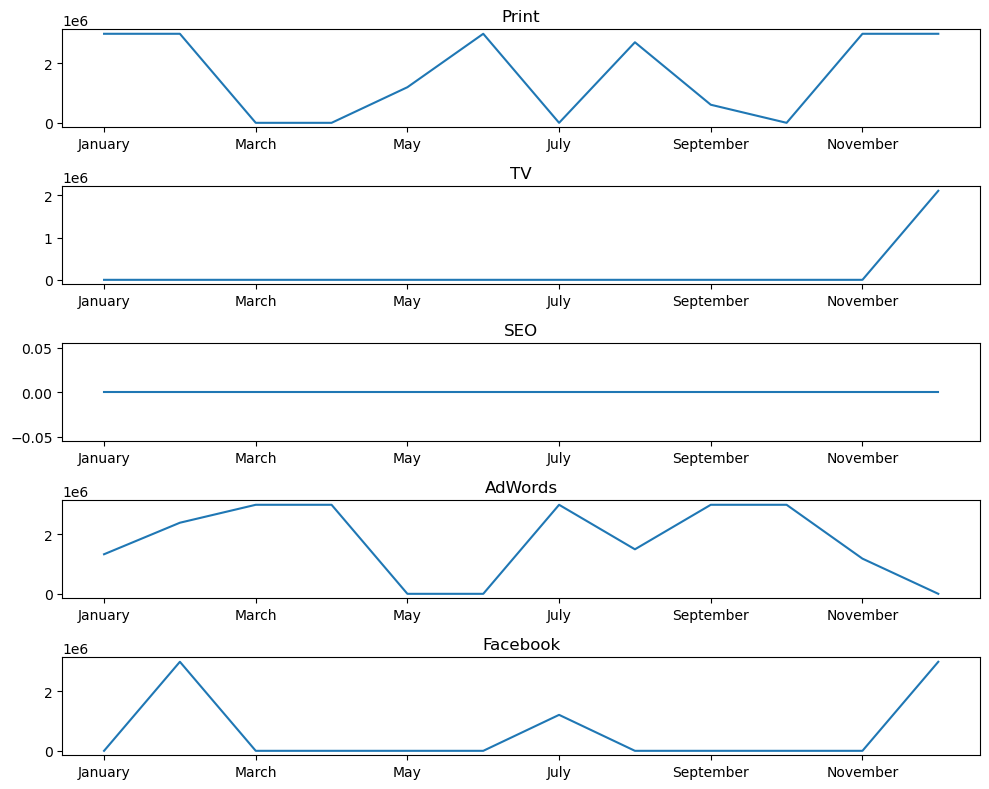

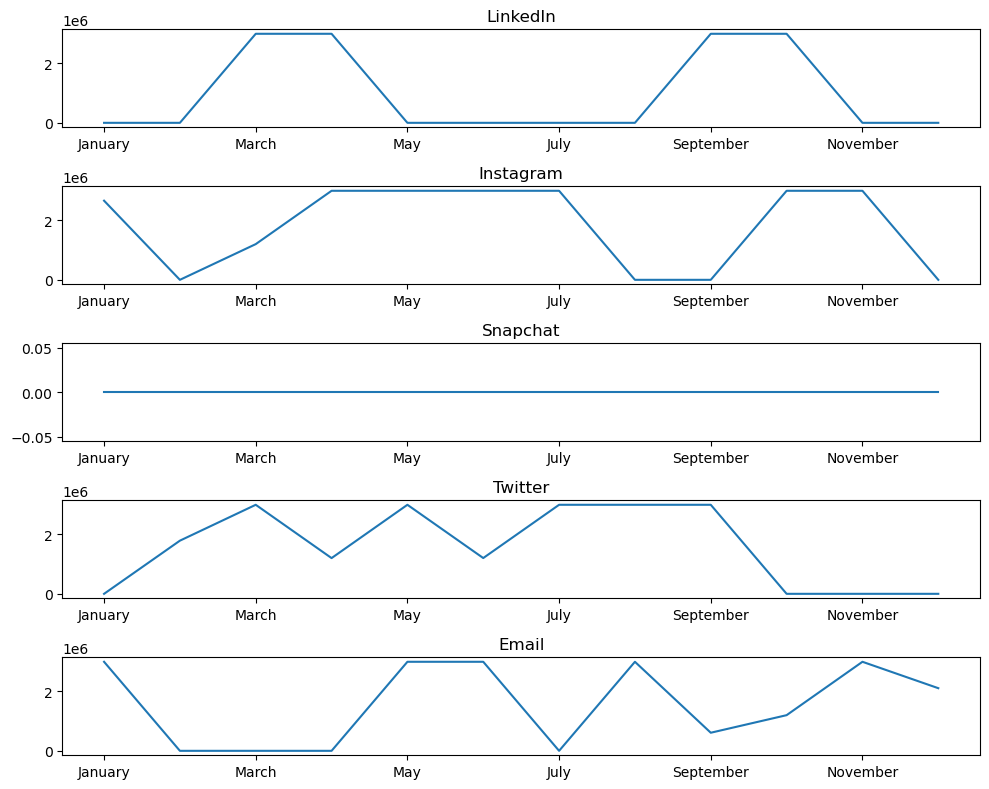

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

series_names = df_alloc.columns.tolist()

num_plots = 5
for i in range(0, len(series_names), num_plots):
    fig, axes = plt.subplots(nrows=num_plots, figsize=(10, 8))
    for j, ax in enumerate(axes):
        if i + j < len(series_names):
            df_alloc[series_names[i + j]].plot(ax=ax, title=series_names[i + j])
    plt.tight_layout()
    plt.show()